# MGT-499 Statistics and Data Science - Koala -- Impact of weather shocks on coffee production

# Abstract

The objective of this study is to evaluate the impact of climate variability on Brazil's coffee production on the regional level. To do so, we first analyzed the relationship between temperature rainfall, and annual production of coffee in different regions. Our research will target Arábica coffee as it represents the largest share of the market,it is pricier, it has a higher demand and it is more sensitive to climate. Therefore, we will be able to observe the relation between production and climate more clearly than with Robusta coffee beans which are more tolerant and therefore less at risk.

We conducted an EDA (Exploratory Data Analysis) including univariate, bivariate, and multivariate analysis. Based on the results of the OLS regression, the production of coffee seems to be significantly influenced by altitude,  minimum temperature, average temperature, and  maximum temperature. The model explains 77% of the variance in coffee production. The coefficients are statistically significant at the 5% level. However, the coefficient for the other predictor variable, precipitation (pr) is not statistically significant at the 0.834 level.

In addition to the above analyses, we also conducted a difference-in-differences (DiD) analysis to compare the change in production before and after a severe weather event, a frost, that happened in the regions that were affected and in the regions that were not. The DiD analysis allows us to estimate the causal effect of the event on coffee production. The results of this DiD analysis suggest that the frost event in July 2021 had a negative impact but not statistically significant on coffee production in regions that were affected, compared to regions that were not affected. The estimated magnitude of this impact, as measured by the coefficient for the "post:treated" variable, is not statistically significant at conventional levels (p-value = 0.4938). This suggests that the frost event may have had some impact on coffee production, but the data are not strong enough to support a precise estimate of this impact. It is worth noting that these results are based on a sample of 28 observations and should be interpreted with caution.

Before we begin, we will import all the necessary computation and visualization tools and extensions for the smooth delivery of our research.

In [1]:
#Install needed extensions
%pip install linearmodels

#Import python specifics
import os
import pandas as pd
from IPython.display import display

# Import computational tools
import numpy as np
import scipy.stats as stats
from scipy.stats import skew
from sklearn.linear_model import LinearRegression
import datetime
import linearmodels as lm
from linearmodels import PanelOLS
from linearmodels.panel import generate_panel_data
import statsmodels.formula.api as smf

# Import visualization tools
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.subplots as subplots
import plotly.graph_objects as go
import json
import plotly
import seaborn as sns
from plotly.subplots import make_subplots




Note: you may need to restart the kernel to use updated packages.


In [2]:
#set your directory here: 
project_dir = r"C:\Users\Charlotte Ahrens\Documents\Documents\GitHub\Final_project_coffee_climate_\Doing_file_merged\Assignment 2\Total_data_used"

# 1 Introduction

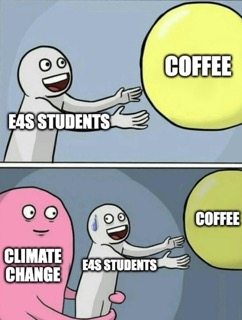

In [3]:
#import of the geojson for world and brazil
data_file_4 = os.path.join(project_dir,"countries.geojson")
json_file = open(data_file_4)
countries = json.load(json_file)

data_file_5 = os.path.join(project_dir,"brazil-states.geojson.txt")
json_file = open(data_file_5) 
brazil = json.load(json_file)


#Import cleaned data
data_file_6 = os.path.join(project_dir,"clean_coffee_production.csv")
coffee_production = pd.read_csv(data_file_6)

data_file_7 = os.path.join(project_dir,"clean_coffee_production_regional.xlsx")
coffee_production_reg_total = pd.read_excel(data_file_7)

data_file_8 = os.path.join(project_dir,"clean_coffe_production_regions.xlsx")
coffee_production_regions = pd.read_excel(data_file_8)

data_file_9 = os.path.join(project_dir,"clean_coffee_production_arábica.xlsx")
coffee_production_arábica = pd.read_excel(data_file_9)

data_file_10 = os.path.join(project_dir,"clean_coffee_production_arábica_t.xlsx")
coffee_production_arábica_t = pd.read_excel(data_file_10)

data_file_11 = os.path.join(project_dir,"clean_coffee_production_arábica_code_unique_melt.xlsx")
coffee_production_arábica_code_unique_melt = pd.read_excel(data_file_11)

data_file_12 = os.path.join(project_dir,"clean_coffee_production_arábica_melt.xlsx")
coffee_production_arábica_melt = pd.read_excel(data_file_12)

data_file_13 = os.path.join(project_dir,"clean_brazil_regional_temperature_data.xlsx")
brazil_regional_temperature_data = pd.read_excel(data_file_13)

data_file_14 = os.path.join(project_dir,"clean_brazil_regional_rainfall_data.xlsx")
brazil_regional_rainfall_data = pd.read_excel(data_file_14)

data_file_15 = os.path.join(project_dir,"df_merged.xlsx")
df_merged_1 = pd.read_excel(data_file_15)

data_file_16 = os.path.join(project_dir,"df_did.xlsx")
df_did = pd.read_excel(data_file_16)

data_file_17 = os.path.join(project_dir,"df_reg.xlsx")
df_reg = pd.read_excel(data_file_17)


## 1.1 Coffee production and climate

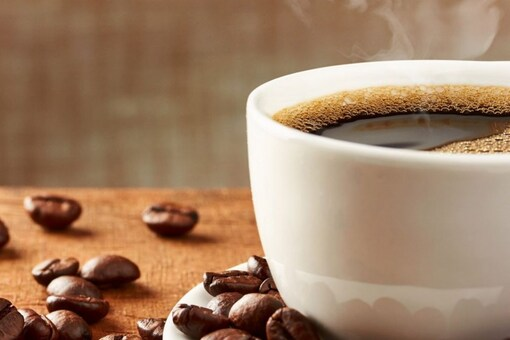

Coffee is a beverage that is enjoyed by millions of people around the world. It is not only a tasty and invigorating drink, but also a cultural phenomenon that has its own rituals and lifestyles associated with it. From the rich, full-bodied aroma of a freshly brewed cup of coffee to the satisfying feeling of sipping a warm beverage on a cold morning, there are many reasons why coffee is such a pleasure. A large number of people we know drink coffee, whether it's in the morning at IMD to start their day or late at night in the library to finish a Statistics and Data Science project. (Personally we enjoy it and we are not alone.) Despite the ease of buying your coffee at the local coffee shop, unfortunately obtaining a cup of coffee will become more and more challenging in the upcoming years. The reason is the ongoing climate change, that threatens the survival of the crops and the quality of  our coffee. 

Global Warming, deforestation, extreme weather events, and pests are all contributing to the loss of coffee crops. Scientists warn that conservation, crop monitoring and seed preservation will be necessary in order to save the world's most beloved beverage from extinction. Beyond the environmental consequences, coffee is a $70 billion/year industry that is primarily supplied by small-scale farm in Africa, Asia, and Latin America. Not only the supply chain is jeopardized, but also the livelihoods of about 25 million farmers, who rely on their coffee production to provide for their families. The socio-economic impacts that climate change forces on this industry are enormous and countries that rely on coffee as their key economic sector are likely to witness a large fall in their GDP within the upcoming years.

Due to the presence of this topic, we asked ourselves, **what is the actual impact of climate variability on coffee production ?** This question any many more, we will answer in this article. 
 

## 1.2 Global coffee production

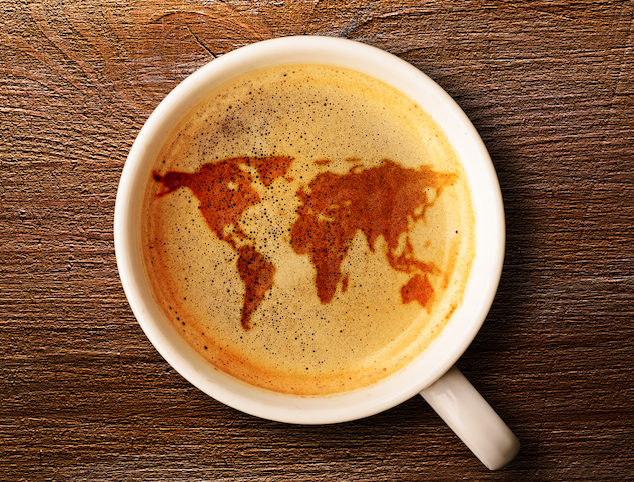

Let's start with a look on the global coffee production, including key countries, as well as growth patterns among the main stakeholders. To mention upfront, the process we had to undergo in order to clean and prepare our data for analyses can be found in the Appendix.

In [4]:
# generation of a series of just values from 2019.
coffee_production_2019 = coffee_production[['Country','2019']]
coffee_production_2019 = coffee_production_2019[coffee_production_2019['Country'] != 'Total']
coffee_production_2019

,Country,2019
0,Angola,3110.514
1,Bolivia (Plurinational State of),4875.924
2,Brazil,3492642.762
3,Burundi,16348.128
4,Ecuador,33536.112
5,Indonesia,685976.550
6,Madagascar,22998.750
7,Malawi,962.586
8,Papua New Guinea,45103.260
9,Paraguay,1200.228


In [5]:
coffee_production_2019.set_index('Country', inplace=True)
coffee_production_2019

,2019
Country,
Angola,3110.514
Bolivia (Plurinational State of),4875.924
Brazil,3492642.762
Burundi,16348.128
Ecuador,33536.112
Indonesia,685976.550
Madagascar,22998.750
Malawi,962.586
Papua New Guinea,45103.260


In [6]:
top10_coffee_producers = coffee_production_2019.sort_values(by='2019', ascending=False).iloc[0:10]

fig = px.bar(x=top10_coffee_producers.index, y=top10_coffee_producers['2019'], title='Top Coffee Producers in 2019')


fig.update_traces(
    hovertemplate='<b>%{y:,.2f}<extra></extra>',
    marker={'color':"#400604"})

fig.update_layout(margin={'r':50,'t':50})

fig.update_layout(xaxis={'title':''},
                  yaxis={'title':'Coffee Production, Tons'},
                  title={
                        'y':0.95,
                        'x':0.5,
                        'xanchor': 'center',
                        'yanchor': 'top'},
                  plot_bgcolor="#F9F9F9",
                  width=670,
                  height=450)

#plotly.offline.iplot(fig, filename='top_prod')
fig.show()

In [7]:
palette = plotly.colors.make_colorscale(["#ebe1d7","#f66749","#9b3727","#400604"])

fig = px.choropleth_mapbox(coffee_production_2019, geojson=countries, color='2019',
                           locations=coffee_production_2019.index, featureidkey="properties.ADMIN",
                           center={"lat": 23, "lon": 3}, labels={'color':'Production<br>(Tons)'},
                           mapbox_style="carto-positron", zoom=.2, 
                           color_continuous_scale=palette, custom_data=[coffee_production_2019.index, coffee_production_2019['2019']],
                           opacity=.9,  title='World Coffee Production in 2019')

fig.update_layout(margin={"b":30,'l':30,'t':50}, width=660, height=450)

fig.update_traces(
    hovertemplate='<b>%{customdata[0]}</b>' +  "<br>Production: %{customdata[1]:,.2f} Tons<extra></extra>")



fig.update_layout(title={
                        'y':0.95,
                        'x':0.5,
                        'xanchor': 'center',
                        'yanchor': 'top'})

                 
#plotly.offline.iplot(fig, filename='map_word_production')
fig.show()

The first thing that leaps out in the map is that Brazil is by far the largest coffee grower in the world, producing almost 3.5 million tons of coffee on 2019, which accounts for 35% of the total production. When we originally started working on this project, we suspected that Brazil was the world's largest coffee producer due to the popularity and delectability of its mixes; nevertheless, we were surprised to learn that Vietnam was ranked second among global producers. In 2019, Vietnam produced over 1.8 million tons of coffee, accounting for 18.5% of the total coffee production. Vietnam also produces one of the world's most costly coffees, Weasel Coffee, which is a coffee bean that has been chewed and digested by a civet before it is being roasted.

Moreover, in terms of regions, Latin America is the most important producing region in the world, producing more than half of the entire world coffee production (58%). It is followed by Asia with around 30% of the world production.
In Africa, the main producer of coffee is Ethiopia with 440,605 tons per year. Ethiopia is also one of the two rare countries where coffee is believed to be native, the other one is Yemen. Even though both countries are linked together to the history of coffee, their production of coffee in the present differs a lot, as Yemen only produces about 6,000 tons.




In [ ]:
# transpose to change the year into the index and then select just the total
coffee_production_total = coffee_production[coffee_production['Country'].isin(['Total'])]
coffee_production_total = coffee_production_total.T
coffee_production_total = coffee_production_total.set_axis(['Total'], axis='columns', inplace=False)
coffee_production_total = coffee_production_total[~coffee_production_total['Total'].isin(['Total'])]
coffee_production_total.head(30)

In [ ]:
fig = px.line(x=coffee_production_total.index,y=coffee_production_total['Total'], title='Production of Coffee from 1990 to 2019')

fig.update_traces(
    hovertemplate='<b>%{y:,.2f}<extra></extra>',
    line={'color':"#400604"})

fig.update_layout(margin={'r':50,'t':50})

fig.update_layout(xaxis={'title':'Year'},
                  yaxis={'title':'Coffee Production, Tons'},
                  title={
                        'y':0.95,
                        'x':0.5,
                        'xanchor': 'center',
                        'yanchor': 'top'},
                  plot_bgcolor="#F9F9F9",
                  hovermode='x',
                  width=670,
                  height=450)

#plotly.offline.iplot(fig, filename='prod_total')
fig.show()

Let's display the production evolution of the top 5 coffee producers:

In [ ]:
top5_list = ['Brazil', 'Vietnam', 'Colombia', 'Indonesia', 'Ethiopia']
top5_coffee_producers = coffee_production[coffee_production['Country'].isin(top5_list)]
top5_coffee_producers = top5_coffee_producers.set_index(['Country'])
top5_coffee_producers.head(5)

In [ ]:
#Create figure object
fig = go.Figure()

# Add line for each row of dataframe
for row in top5_coffee_producers.iterrows():
    fig.add_trace(go.Scatter(x=top5_coffee_producers.columns, y=row[1].values, name=f"{row[0]}"))
    
fig.update_layout(
    title="Production of Coffee from 1990 to 2019",
    xaxis_title="Year",
    yaxis_title="Coffee Production, Tons",
    legend_title="Country")

# Show figure
fig.show()

Overall, the total production of coffee has been increased in the latest years, peaking in 2019 with a global production of 9.9 million tons of coffee. This increment can be seen in the graph above, where production almost doubled from 1990 to 2019. 

This rate of production is likely to be unsustainable in the next years, as a so-called "Coffee Crisis" is expected due to climate change. As temperatures continue to rise, the meteorological conditions for growing coffee, particularly Arábica coffee, which requires moderate temperatures, are becoming a new challenge.  



## 1.3 Brazil coffee production overview
Brazil is the world’s largest coffee producer worldwide, covering one third of worldwide demand according to [“Brazil.” by Melbourne Coffee Merchants (2022)](https://melbournecoffeemerchants.com.au/origin/brazil/). The country’s prominence in the coffee industry is greatly related to its size and its climate suitability to grow the two most famous types of coffee beans: Arábica and Robusta). These two coffee types vary in taste, quality, price, and growing environment. 
 - Robusta is more resistant to climate, easier to grow and due to its higher caffeine level it's associated with a more bitter taste. It is known by having a lower quality, and is consequently about half of the price of Arábica beans.[The Roasters Pack. “10 Differences between Robusta &amp; Arabica Coffee.” (2014)](https://theroasterspack.com/blogs/news/15409365-10-differences-between-robusta-arabica-coffee) 
 - Arábica, instead is harder to grow, as they are more sensitive to climate variability and are knows as a quality bean  due to isand therefore more expensive. 
 
Arábica coffee beans represent 70% of the global coffee production compared to 30% for Robusta.(Damatta and Ramalho, 2006; Davis et al., 2012) This is explained by the higher demand for Arábica beans which are considered to have a higher quality and being sweeter, softer in flavor with a higher acidity. Consequently, Robusta is mainly used in espresso blends while Arábica is mainly used for fresh coffee.



In [ ]:
# Create figure object
fig = go.Figure()

# Add line for each row of dataframe
for row in coffee_production_reg_total.iterrows():
    fig.add_trace(go.Scatter(x=coffee_production_reg_total.columns, y=row[1].values, name=f"{row[0]}"))
    
fig.update_layout(
    title="Brazilian's total coffee production from 2002 to 2022",
    xaxis_title="Year",
    yaxis_title="Coffee Production",
    legend_title="Regions")

# Show figure
fig.show()

While this graph shows us an overall increasing trend in coffee production in Brazil over the years, it also brings our attention to natural coffee variability. Indeed, we can clearly see that the production does not increase constantly but has higher and weaker years alternating every two years. When analyzing the impact of climate change coffee production, we will need to take this observed natural variability into account.

In [ ]:
#creating a subset which only includes the total coffee production history from 2002 onwards. 
coffee_production_total = coffee_production_regions.iloc[-1:]
coffee_production_total

In [ ]:
#creating a subset which only includes the total columns of both coffee types Arábica and Robusta
coffee_production_total_type = coffee_production_regions.iloc[-3:-1]
coffee_production_total_type


In [ ]:
coffee_production_total_type = coffee_production_total_type.set_index("kind")


In [ ]:
coffee_production_total_type.columns = pd.to_datetime(coffee_production_total_type.columns)
start_date = datetime.datetime(2012, 1, 1)
df = coffee_production_total_type.loc[:, start_date:]


While the production of arabica shows a clear dominance in the market, it also demonstrate a greater variability over the years than robusta coffee.

In [ ]:
# Create figure object
fig = go.Figure()

# Add line for each row of dataframe
for row in coffee_production_total_type.iterrows():
    fig.add_trace(go.Scatter(x=coffee_production_total_type.columns, y=row[1].values, name=f"{row[0]}"))
    
fig.update_layout(
    title="Brazilians coffee production from 2002 to 2022 by region",
    xaxis_title="Year",
    xaxis=dict(range=['2012', '2022']),
    yaxis_title="Coffee Production",
    legend_title="Coffee Type")

# Show figure
fig.show()

## 1.4 Research question

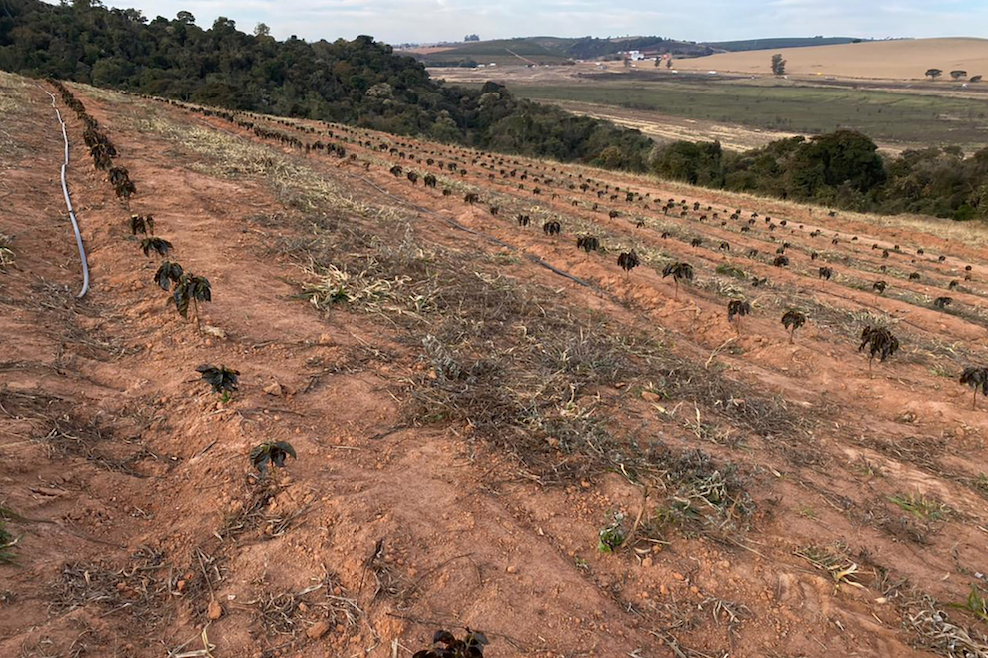

We would like to test the effects of rainfall and temperature variations on coffee production in <font color="#FF0000"> Brazil </font>, the world's most important coffee producer. We decide to analyze <font color="#FF0000"> climate variability through rainfall and temperature </font> because they are the two most important variables for successful high coffee yields. Our research will target <font color="#FF0000"> Arabica coffee </font> as it represents the largest share of the market, is pricier, has a higher demand and is more sensitive to climate so we will be able to observe the relation between production and climate more clearly than with Robusta coffee beans which are more tolerant and therefore less at risk.

In July 20th 2021, sub-zero (-1.2 Celcius in Minas Gerais) temperatures led to the worst frost in decades targeting Brazil’s most important coffee producer region, Minas Gerais. Coffee trees were damaged and destroyed by the frost and coffee production will take at least 3 years to recover from it. This harsh weather event had a substantial impact on the entire global coffee market.


## 1.5 Methodology (Data, DID...)

In this project, we will answer our research question using the programming language Python. Datasets were acquired from different websites, including, the International Coffee Organization (ICO) to receive data of the coffee production from 1990 to 2019.  For regional production data of Brazil, we found, after long research, the Brazilian database from the Brazilian coffee association. economic (ABIC - Associação Brasileira da Indústria de Café). In addition, local, daily temperature and precipitation data, we obtained through the website of Brazilian's national meteorology institute (https://portal.inmet.gov.br/), who sent us the raw data files. In order to find the right regions,  we took the averages from several weather stations and so obtained the min, max and average temperature per region.  Furthermore, for mapping purposes we got data for coordinates from kaggle (https://www.kaggle.com/datasets?search=world+jso)
The data search process was quite intensive due to the need of specific, local data from Brazil, which was only available through Portuguese key word search. 

We chose our sample size focusing on Arábica bean, due to their sensitivity on climate variability. In addition we focused on the coffee producing regions where we found relevant data for coffee production and we had weather data availability in these regions. Furthermore, we look at a recent shock event in July 2021, since this raised once again the question in the media on consequences that humanity will face due to climate change. For the shock we look at the years from 2020 until 2022, in order to study the impact of this event before and after. 

In order to research the pre and post results from the controlled and treatment group, we conducted a Difference in Difference Analyses (Diff in Diff): We selected the control group based on the minimum temperature in a specific region at a specific day and weighted it against the average minimum temperature of the regional winter seasons from July 2019 until June 2022. The winter season in Brazil ranges from 1st of June until the 31st of August, and it was looked  only on this period, since it is the main season, when coffee crops are extremely vulnerable to extreme events like frosts, heat or droughts. On more detailed step by step coding explanation, please look at the appendix. 
If the minimum temperature of a region in one day was further away than 65% from the mean minimum temperature, that we calculated as mentioned above, then we ranked it as a severe event and therefore included the group in the treatment group. If no such event happened during the winter month, the region was ranked as a control. 

On top of the Diff in Diff on such an event, we run a panelOLS regression model to see if our results would be of significance relevance.  


# 2 Background

## 2.1 Literature review

As climate change becomes increasingly concerning, its impact on coffee production has been the subject of interest of numerous studies. Indeed, the current coffee producers may be challenged by climate variations affecting the productivity of their coffee beans, which have specific climate requirements in order to grow.

Alarming studies find that the impact of climate change on production has already been felt in some countries. Brazil is one of the affected countries with the presence of extreme events such as the drastic frosts in 1975, 1984, 1994 and 2000. (Leonor Marcon et al., 2008). Apucarana in Parana, Brasil, located in a climate transition area between tropical and subtropical climate, had to transition from coffee crops to soybean cultivation, corn, wheat and sugar cane due to climate variability and profitability concerns (Marina Ronchesel Ribeiro et al., 2020). This change in land suitability for coffee production is projected to decrease significantly. Christian Bunn, 2015 studies the decline of land suitability: “by 2050 on only half the area that is currently available for coffee production 2.5-times as much coffee will have to be produced to meet future demand.”

Indeed, the specific growth conditions required for coffee cultivation makes its production particularly sensitive to climate change. Several studies examine the effect on climate variability on coffee production in distinct countries. They find that climate variability is likely to negatively affect coffee production in India. (P. Chengappa, C. Devika), in Tanzania (Suzana G. Mbwambo, S. Mourice, A. J. Tarimo) and even worldwide (Ebisa Dufera Bongase). According to reviews, climatic variability is the main factor responsible for the oscillations and frustrations of the coffee grain yield in Brazil (M. Camargo).


We collected information on the specific climate conditions needed for fruitful coffee production. Mangal (2007) states that the appropriate rainfall level for optimal results lies between 1500 and 2000 millimeters. However, rainfall should be distributed uniformly over ¾ of the year and be followed by a dry period to enable blossom (Mangal, 2007). Coffee beans also require high humidity, rich soils and a good balance between sun and shade, all of which can be found in subtropical climates. Other studies also examine the consequences of temperature increase on coffee production through the coffee leaf rust epidemics (Joel Iscaro) or the loss of suitable land for coffee production due to climate change in general (Jamillo et al.) and estimate a possible 65 percent reduction in suitable land for Arabica coffee growth (Davis et al.). 

Finally, a review on the impact of climatic variability and climate change on arabic coffee crop in Brazil talks about the importance of agronomic techniques, such as planting at high densities, correct irrigation, and breeding programs, can be used to mitigate the negative impacts of extreme meteorological events and global warming on coffee crops. (M Camargo, 2010). They also find droughts and extreme temperature to be the main challenge for crops.






## 2.2 Variable selection

We would like to study the impact of climate vairability on arabica coffee production in Brazil. In order to do so, we will analyze the most recent climate shock on coffee crops in Brazil: The July 2021 frost.

In order to perform our research, we will study the impact of two explanatory variables on our outcome variable.
- Brazilian's Arabica coffee production at the regional level. This is our outcome variable.
- Brazilian regional temperatures is our explanatory variable 
- Brazilian regional precipitations is our explanatory variable for heterogeneity


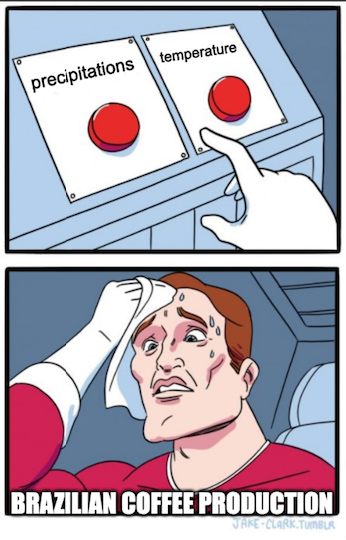

### 2.2.1 Outcome variable - Brazilian's state coffee production

In this section we will take a closer look at our outcome variable, which is the Arábica coffee production in Brazil. Brazil is divided into 26 states, and of these, half (13) have coffee plantations or farms.  Indeed, some of them like AM - Amazonas and MT - Mato Grosso, have no or very little production of Arábica coffee, and therefore will not be considered in our analysis. In Brazil, most of the coffee is grown in the southeastern region of the country comprising five states – Bahia, Espírito Santo, Minas Gerais, Paraná, and São Paulo.”.
https://www.nomadcoffeeclub.com/pages/brazil


In [ ]:
# generation of a series of just values from 2022.
coffee_production_arábica_2022 = coffee_production_arábica_t.iloc[-1]
coffee_production_arábica_2022

In order to understand state arabica coffee production in Brazil, let's look at the coffee regional production. As Minas Gerais is by far the largest arabica producer in the country, we have decided to divide it in four regions (South-West, North-West, Central, North) and to treat them separately for the purpose of our analysis.

In [ ]:
#visualizing the coffee production per region as a bar chart 
coffee_production_arábica_2022 = coffee_production_arábica_2022.sort_values(ascending=False)


fig = px.bar(x=coffee_production_arábica_2022.index, y=coffee_production_arábica_2022, title="Brasilian's regional coffee producers in 2022")


fig.update_traces(
    hovertemplate='<b>%{y:,.2f}<extra></extra>',
    marker= {'color':"#400604"})
fig.update_layout(xaxis=dict(tickangle=45))
fig.update_layout(margin={'r':50,'t':50})

fig.update_layout(showlegend=True)
                    


fig.update_layout(xaxis={'title':''},
                  yaxis={'title':'Coffee Production'},
                  title={
                        'y':0.95,
                        'x':0.5,
                        'xanchor': 'center',
                        'yanchor': 'top'},
                  plot_bgcolor="#F9F9F9",
                  width=670,
                  height=450)

fig.show()

We observe that Minas Gerais is the most productive state in Brazil and this even after dividing it in 4 regions. It is followed by São Paulo, Espírito Santo, Bahia, Paraná. Goiás, Río and Amapá have a substantially smaller production and no production for Mato Grosso.

In [ ]:
# share of each coffee region on the total production in Brazil
arábica_percentage = (coffee_production_arábica_2022/coffee_production_arábica_2022.sum()*100).sort_values(ascending=False)
arábica_percentage

In [ ]:
#creating pie chart for regional arabica data 
fig = px.pie(values=arábica_percentage.values, names=arábica_percentage.index, title ="Brazil State-Level Coffee Production (as % of total)")              

fig.update_layout(margin={'r':50,'t':50})

fig.update_layout(xaxis={'title':''},
                  yaxis={'title':'Coffee Production (in Tons)'},
                  title={
                        'y':0.95,
                        'x':0.5,
                        'xanchor': 'center',
                        'yanchor': 'top'},
                  plot_bgcolor="#F9F9F9",
                  width=670,
                  height=450)

fig.show()

This bar chart above, clearly indicates the importance of the state MG (SW) Minas Gerais - Southwest for Brazilians coffee production. Nearly 700million kg of coffee were produced in this region in 2022. This adds up to ~37% of Brazilians total coffee production. It is followed by Minas Gerais Northwest and Minas Gerais Central 

In [ ]:
coffee_production_arábica

In [ ]:
#Arábica development line graph 
#coffee_production_arábica = coffee_production_arábica.set_index("index")
# Create figure object
fig = go.Figure()

# Add line for each row of dataframe
for row in coffee_production_arábica.iterrows():
    fig.add_trace(go.Scatter(x=coffee_production_arábica.columns, y=row[1].values, name=f"{row[1]['state']}"))
    
fig.update_layout(
    title="Brazilian's regional coffee production from 2002 to 2022",
    xaxis_title="Year",
    yaxis_title="Coffee Production",
    legend_title="Coffee Type")

# Show figure
fig.show()

For some of the states, there was no differentiation between Robusta and Arábica before 2012 and there is missing data. This does not mean the production was at 0 before that but only that we don't have exclusive data only for Arabica production at the state level before this date. This, explains the sudden increase in coffee production for certain regions such as Minas Gerais for which we do not have separate data of coffee for Arabica as well as for our state separations (North, Central, South-West, North-West). 

When ignoring this issue we still see MG (NW) dominance in the Arabica production in Brazil. We also observe that for many states, the overall trend is an increase in coffee production. However, we see that the increase is not direct but that instead, there are constant variations over the years. Indeed, one every two years seems to be weaker than the others. This variation is called the “biennial effect”. (Tiago Bernardes et al. 2012)

In [ ]:
state_id_map = {}
for feature in brazil ["features"]:
 feature["id"] = feature["properties"]["sigla"]
 state_id_map[feature["properties"]["name"]] = feature["id"]

In [ ]:
fig = px.choropleth_mapbox(
 coffee_production_arábica_code_unique_melt, #database
 locations = "state", #define the limits on the map/geography
 geojson = brazil, #shape information
 color = "production", #defining the color of the scale through the database
 hover_name = "state", #the information in the box
 hover_data =["index","production","state"],
 title = "Brazilian's regional coffee production", #title of the map
 mapbox_style= "carto-positron",
 center={"lat":-14, "lon":-55},
 zoom = 3,
 opacity = 0.5,
 animation_frame = "index" #creating the application based on the year
)

#fig.update_geos(fitbounds = "geojson", visible = True)
fig.show()

The above brazilian map shows the development of Arábica among the regions from 2003 until 2022. It clearly indicates that the Eastern regions are developing stronger compared to the inland production. 

In [ ]:
coffee_production_arábica_summary = coffee_production_arábica_melt.groupby("state")["production"].describe()
coffee_production_arábica_summary

In [ ]:
#histogram to explore skewness
skewValue = coffee_production_arábica_melt["production"].skew()
print("Skewness coffee_production: ")
print(skewValue)

plt.hist(coffee_production_arábica_melt["production"],     
         color = "g")                      
plt.title("Histogram of regional coffee production in Brazil")     
plt.grid(True)       
plt.show()   

### 2.2.2 Explanatory variable (1) - Regional temperatures Min and Max

Now we will analyze our main explanatory variable: temperature. In order to focus on extreme temperatures we will focus on minimal and maximal temperatures. However, since we are analyzing a frost we have decided to analyze colder temperature shocks by using minimum temperature.

In [ ]:
# Iterate through each state in the dataframe
for state in brazil_regional_temperature_data['state'].unique():
    # Select the data for the current state
    state_data = brazil_regional_temperature_data[brazil_regional_temperature_data['state'] == state]
    
    # Create a figure for the current state
    fig = go.Figure()

    # Add a trace for the daily minimum temperature
    fig.add_trace(go.Scatter(x=state_data['date'], y=state_data['min_temp'], name='Min temp'))
    # Add a trace for the average temperature
    fig.add_trace(go.Scatter(x=state_data['date'], y=state_data['avg_temp'], name='Avg temp'))
    # Add a trace for the daily maximum temperature
    fig.add_trace(go.Scatter(x=state_data['date'], y=state_data['max_temp'], name='Max temp'))

    # Set the title and labels for the figure
    fig.update_layout(title='Temperature in ' + state, xaxis_title='Date', yaxis_title='Temperature (°C)')

    # Display the figure
    fig.show(renderer="colab")

These graphs show daily temperature (including minimum, average and maximum) data since January 2019 to Jully 2022 for each state of interest. Focusing on the blue lines enables us to see very clearly temperature shocks. Notice the scales are different depending on the graph in order to be able to observe temperature variations more easily. 

Seasonal variations in temperature are clearly apparent in the graphs with lower temperatures in winter from june to september overall in all states.

Various regions experienced a clear temperature shock when the frost appeared in July 2021. MT, PA, SP have seen their minimum and avarage decrease substantially. MG (C) experienced a minimum  temperature. However, the biggest shock is observed in MG (SW) where the temperatures dropped below 5 degrees celcius. MG (C) temperatures also dropped below zero with a -1.2 degrees minimal temperature. 

In [ ]:
#Average temperature Histogram
plt.hist(state_data.loc[:,"avg_temp"], color = "orange")
plt.title('Average yearly temperatures in Brazil')
print(skew(state_data["avg_temp"]))
plt.title("Histogram of average temperatures in Brazil")
plt.xlabel('Degrees in Celcius', fontsize=10)
plt.ylabel('frequency', fontsize=10)


Arabica ideally grows in temperatures between 15°C and 24°C. This histogram of Brazil's temperatues is within this range thus proving why Brazil's climate is ideal for Arabica coffee production.

In [ ]:
# Histogram of winter minimal temperatures
winter_temps = df_merged_1[df_merged_1['season'] == 'winter']['min_temp']
plt.hist(winter_temps)
print(skew(state_data["min_temp"]))
plt.title('Minimum Temperatures in Brazil in the Winter Season')
plt.xlabel('Temperature (°F)')
plt.ylabel('Number of Days')
plt.show()

Here, we can see that sub-zero temperatures are rare in Brazil. This explains why Brazil's climate is globally ideal for coffee production with winter minimul temperatures ranging mostly between 10 and 20 degrees.

### 2.2.3 Explanatory variable (3) - State precipitation

In [ ]:
#transforming the precipitation column from object into a float
obj_col = df_merged_1['pr']
float_col = pd.to_numeric(obj_col)
df_merged_1['obj_col'] = float_col

Finally, our second explanatory variable is rainfall as precipitations or the lack of (ex. Droughts) have proven to have impacts on coffee production. 

In [ ]:
# Iterate through each state in the dataframe
for state in brazil_regional_rainfall_data['state'].unique():
    # Select the data for the current state
    state_data = brazil_regional_rainfall_data[brazil_regional_rainfall_data['state'] == state]
    
    # Create a figure for the current state
    fig = go.Figure()

    # Add a trace for the daily minimum temperature
    fig.add_trace(go.Scatter(x=state_data['date'], y=state_data['pr'], name='Precipitations (mm)'))

    # Set the title and labels for the figure
    fig.update_layout(title='Precipitations in ' + state, xaxis_title='Date', yaxis_title='Precipitations (mm)')

    # Display the figure
    fig.show()

Precipitations are pretty constant and uniform over time which is positive for coffee production. We can obsereve that most states have the needed 3 month rain stress with little to no precipitations in winter, period where the coffee blossoms and is collected.

We have decided to separate the states that have a dry period and the ones who don't have a clear dry period in two categories.

3 months with low precippitations: 
- ES, MG (C), MG (NW),MG (N), MT, GO, MG (SW)

Winter still has a consequential amount of rainfall: 
- SP, PA, AM, 
- BA and RJ (but with overall yearly low levels of rainfall)

In [ ]:
# Group the data by state and get a summary of the daily precipitation values for each group
precipitation_summary_by_state = brazil_regional_rainfall_data.groupby("state")["pr"].describe()
print(precipitation_summary_by_state)

In [ ]:
# Group the data by state and calculate the mean and median of the daily precipitation values for each group
mean_precipitation_by_state = brazil_regional_rainfall_data.groupby("state")["pr"].mean()
median_precipitation_by_state = brazil_regional_rainfall_data.groupby("state")["pr"].median()
print("Mean precipitation by state:")
print(mean_precipitation_by_state)
print("Median precipitation by state:")
print(median_precipitation_by_state)

In [ ]:
state_data.dtypes

In [ ]:
# Iterate through each state in the data
for state in brazil_regional_rainfall_data["state"].unique():
    # Select the data for the current state
    state_data = brazil_regional_rainfall_data[brazil_regional_rainfall_data["state"] == state]
    
    # Create a histogram of the daily precipitation values for the current state
    state_data["pr"].plot.hist()
    plt.title("Precipitation in " + state)
    plt.show()
    
    print("Skewness for precipitations: ")
    print(skew(state_data['pr'], nan_policy='omit'))

The data is clearly asymetric on the right (skewness > 4) <br>
A log-transformation is necessary.

In [ ]:
#log of precipitations
state_data['log_pr'] = np.where(state_data['pr']>0, np.log(state_data['pr']),0)
log_pr = state_data['log_pr'].skew()
plt.hist(state_data['log_pr'], color = 'blue')                      
plt.title('Histogram of total precipitations per state')
plt.xlabel('kilotonnes (kt) of CO2 per year', fontsize=10)
plt.ylabel('frequency', fontsize=10)
plt.show()
print(skew(state_data['log_pr']))

The ambivalence of the value 0 is due to the fact that there are many days with no precipitations. Negative precipitations are days with evaporation.

In [ ]:
df_merged_1['log_pr'] = np.where(df_merged_1['pr']>0, np.log(df_merged_1['pr']),0)
log_pr = df_merged_1['log_pr'].skew()
df_merged_1

In [ ]:
# Histogram of winter precipitations
winter_temps = df_merged_1[df_merged_1['season'] == 'winter']['log_pr']
plt.hist(winter_temps)
print(skew(df_merged_1["log_pr"]))
plt.title('Rainfall in Brazil in the Winter Season')
plt.xlabel('Rainfall (in mm)')
plt.ylabel('Number of Days')
plt.show()

Once again, the low levels of precipitations explain Brazil's lead as coffee producer.

# 3 Methodology

To analyze the relationship between rainfall, temperature, and production of coffee in different regions, we conducted an EDA (Exploratory Data Analysis) including univariate, bivariate, and multivariate analysis.

For the univariate analysis, we first explored the distribution of each variable by plotting histograms and using descriptive statistics such as mean, median, and standard deviation.

Then, we moved on to bivariate analysis, where we examined the relationship between each variable and the target variable, production. 

In the multivariate analysis, we included all the variables in a multiple regression model to assess their joint effect on production (precipitation, altitude, maximum temperature, minimum temperature, etc.) We used the Ordinary Least Squares (OLS) method to fit the model and obtained a summary of the results, including the coefficients, standard errors, t-values, and p-values.

In addition to the above analyses, we also conducted a difference-in-differences (DiD) analysis to compare the change in production before and after the frost event that happened in July 2021 in the regions that were affected by the event and in the regions that were not. The DiD analysis allows us to estimate the causal effect of the policy/event on production by controlling for other factors that may have influenced the change in production. To analyze the impact of frost events on coffee production in Brazil, we divided the regions into two groups: treated and control. The treated group included regions that experienced frost events in July 2021, as determined by a deviation in daily minimum temperature from the average seasonal minimum temperature greater than 65%. The control group included regions that did not experience frost events.

## 3.1 EDA

### 3.1.1 Bivariate Analysis

In this section, we will analyze the relationship between temperature and coffee production, rainfall and coffee production and temperature and rainfall.

In [ ]:
df_merged_corr = df_merged_1.loc[:,['log_pr', 'production', 'min_temp', 'max_temp']].corr()
df_merged_corr

In [ ]:
#Let's create a subset dataframe with the variables related to rainfall, temperature and coffee production
df_rain_coffee_temp = df_merged_1.loc[:,['date', 'state','log_pr', 'production', 'avg_temp', 'min_temp', 'max_temp']]
#Since our variables are continuous, I will start my mapping them in a heat map to observe their correlation
sns.heatmap(df_rain_coffee_temp.corr(), annot = True, linewidths = 2, linecolor = "white", cmap = "viridis")

**Looking at Heterogeneity: **\\
First I am looking at the correlation between my outcome and explanatory variables. I was expecting to find a positive correlation between some of my variables. Since I was assuming  that if minimum temperature decreases, that also production decreases, especially in the winter. For the max temperature I was expecting a negative correlation. If max temperature increases, the production decreases. This assumption was made due to the fact, that  however my data shows different. 
1. Production - Min temp. There is a negative correlation of 29%, meaning that the higher the forest product per capita, the less tree coverage loss we see. Therefore, this variable is not a good indicator to show heterogenity to my outcome variable. 
2. Production - max temp: we see a slight negative correlation between my explantory variabel and my outcome variable. This means there is no correlation between the tree cover loss in % and the damage that a natural disaster can cause. 
3. Production - Precipitation: There is a 21% negative correlation between our outcome variable and our ...


### Temperature and Coffee Production

Since we want to analyze the impact of temperature shocks, let's focus on the variable "min_temp" in order to focus on the lower temperatures.

In [ ]:
df_merged_winter = df_merged_1[df_merged_1['season'] == 'winter']


In [ ]:
#correlation between min temperature variable and brazilian's coffee production
sns.regplot(x= "min_temp", y= "production", data= df_merged_winter, color= "g").set(title = "Scatterplot of minimum temperatures' impact on coffee production")
plt.xlabel("Min temperature (in °C)")
plt.ylabel("Coffee production (in million tons)")
title = plt.gca().title
title.set_y(1.05)

In [ ]:
#Scatter plot with coloring based on brazilian's regions
sns.scatterplot(x="min_temp", y= "production", legend=False, hue="state", palette="Set3", data=df_merged_winter).set(title= "Scatterplot of minimum temperatures' impact on coffee production per region")
plt.xlabel("Min temperature (in °C)")
plt.ylabel("Coffee production (in million tons)")
title = plt.gca().title
title.set_y(1.05)

In [ ]:
#split the sample into buckets for 
df_merged_winter["min_temp_q"] = pd.qcut(df_merged_winter["min_temp"],[0, .25, .5, .75, 1.], labels=['q1','q2','q3','q4'],
                            retbins=False, precision=3, duplicates='raise')

In [ ]:
df_merged_winter["max_temp_q"] = pd.qcut(df_merged_winter["max_temp"],[0, .25, .5, .75, 1.], labels=['q1','q2','q3','q4'],
                            retbins=False, precision=3, duplicates='raise')

In [ ]:
#df_merged_winter["pr"] = pd.qcut(df_merged_winter["pr"],[0, .25, .5, .75,1.0], labels=['q1','q2','q3','q4'],
#                            retbins=False, precision=3, duplicates='drop')

Since we want to analyze the impact of temperature shocks, let's focus on the variable "max_temp" in order to focus on extreme warm temperatures during critical growing time which is mainly in June to September. Therefore, we will again focus on the winter season. Min -temperatures:

In [ ]:
sns.catplot(x= "min_temp_q", y= "production", hue='min_temp_q', palette=("BuGn"), kind='bar', dodge=False, data= df_merged_winter).set(title="Regional minimum Temperature impact on Coffee production")
title = plt.gca().title
title.set_x(0.7)

In [ ]:
#correlation between min temperature variable and brazilian's coffee production
sns.regplot(x= "max_temp", y= "production", data= df_merged_winter, color= "g").set(title = "Scatterplot of maximum temperatures' impact in the winter on coffee production")
plt.xlabel("Max temperature (in °C)")
plt.ylabel("Coffee production (in million tons)")
title = plt.gca().title
title.set_y(1.05)

In [ ]:
sns.catplot(x= "max_temp_q", y= "production", hue='max_temp_q', palette=("BuGn"), kind='bar', dodge=False, data= df_merged_winter).set(title="Regional maximum Temperature impact on Coffee production")
title = plt.gca().title
title.set_x(0.7)

In [ ]:
sns.catplot(x='min_temp_q', y='production', hue='max_temp_q', palette=("BuGn"), kind='bar', data=df_merged_winter).set(title="Categorical analyses of weather impact on coffee production")
title = plt.gca().title
title.set_x(0.7)

*Result interpretation:**\

### Rainfall and Coffee Production

In [ ]:
#Let's create a subset dataframe with the variables related to rainfall and coffee production
df_rainfall_coffee = df_merged_1.loc[:,['date', 'state','log_pr', 'production']]
#Since our variables are continuous, I will start my mapping them in a heat map to observe their correlation
sns.heatmap(df_rainfall_coffee.corr(), annot = True, linewidths = 2, linecolor = "white", cmap = "viridis")

A negative correlation of 0.21 between precipitations and coffee production is observed. This means that more rain leads to less coffee production.

In [ ]:
sns.regplot(x = "log_pr", y = "production", data = df_merged_1)
plt.xlabel('Precipitations')
plt.ylabel('Production')

### Rainfall and Temperature

In [ ]:
sns.regplot(x = "log_pr", y = "avg_temp", data = df_merged_1)
plt.xlabel('Precipitations')
plt.ylabel('Average Temperature')

In [ ]:
sns.regplot(x = "log_pr", y = "min_temp", data = df_merged_1)
plt.xlabel('Precipitations')
plt.ylabel('Minimum Temperature')

In [ ]:
sns.regplot(x = "log_pr", y = "max_temp", data = df_merged_1)
plt.xlabel('Precipitations')
plt.ylabel('Maximum Temperature')

Clearly we would need to separate by season

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the unique values of the "season" column
seasons = df_merged_1['season'].unique()

# Set the number of rows and columns for the figure
nrows = 2
ncols = 2

# Create the figure and axes
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 8))

# Loop through each season
for i, season in enumerate(seasons):
  # Select the rows for the current season
  df_season = df_merged_1.loc[df_merged_1['season'] == season, :]
  
  # Get the row and column indices for the current plot
  row = i // ncols
  col = i % ncols
  
  # Create the scatterplot
  sns.regplot(x='log_pr', y='min_temp', data=df_season, ax=ax[row, col])
  ax[row, col].set_xlabel('Precipitations')
  ax[row, col].set_ylabel('Minimum Temperature')
  ax[row, col].set_title(season)

# Show the plot
plt.show()

## 3.1.2 Multivariate analysis

$production_{it} =\beta_0+\beta_1*altitude_i +\beta_2*temp^{max}_{ir} + \beta_3*temp^{min}_{ir} + \beta_4*temp^{avg}_{ir} + \beta_5*log(precipitation)_{ir} + \epsilon_{ir}$

In [ ]:
df_reg = df_reg.reset_index()

In [ ]:
df_reg = df_reg.drop_duplicates(['date','state'], keep='first')

In [ ]:
df_reg.head(5)

In [ ]:
# Set year column as index
df_reg.set_index('date', inplace=True)
# Set state column as secondary index
df_reg.set_index('state', append=True, inplace=True)


In [ ]:
del df_reg['index']

In [ ]:
#add log precipitations to our data frame
df_reg['log_pr'] = np.where(df_reg['pr']>0, np.log(df_reg['pr']),0)
log_pr = df_reg['log_pr'].skew()
df_reg

In [ ]:
# Define the regression formula
formula = 'production ~ altitude + avg_min_temp_annual + avg_temp_annual + avg_max_temp + log_pr'

# Fit the regression model
model = smf.ols(formula=formula, data=df_reg).fit()

# Display the summary of the model
print(model.summary())

The results of the OLS regression show that the model explains 77.3% of the variance in the dependent variable, "production". The F-statistic of 20.41 and the associated p-value of 7.65e-09 suggest that the model is statistically significant.

The coefficients for the independent variables indicate the expected change in the dependent variable for a one unit change in the independent variable, holding all other variables constant. For example, the coefficient for "altitude" is -5.645e+05, which means that for every 1 unit increase in altitude, we would expect a decrease of approximately 564,500 units in production.

The p-values for the independent variables indicate the statistical significance of each variable in predicting the dependent variable. For example, the p-value for "altitude" is 0.002, which indicates that altitude is a statistically significant predictor of production.

Finally, the Omnibus, Durbin-Watson, Jarque-Bera, and Cond. No. statistics can be used to assess the assumptions of the model. The Omnibus and Jarque-Bera tests check for the assumption of normally distributed residuals, while the Durbin-Watson and Cond. No. statistics check for the assumption of homoscedasticity. The p-values for these tests indicate whether these assumptions are met. In this case, the p-values for the Omnibus and Jarque-Bera tests suggest that the assumption of normally distributed residuals may not be met, while the p-values for the Durbin-Watson and Cond. No. tests suggest that the assumption of homoscedasticity may not be met. This could be a cause for concern and may warrant further investigation.

In [ ]:
# Define the regression formula
formula = 'production ~ altitude + avg_min_temp_annual + avg_temp_annual + avg_max_temp + log_pr'

# Fit the regression model
model = smf.ols(formula=formula, data=df_reg).fit()

# Display the summary of the model
print(model.summary())

# 3.2 Difference in Differences
#### Examining the effects of a frost event on the regional coffee production in Brazil

A difference-in-differences (DID) analysis is a statistical technique that can be used to identify the impact of a particular event or policy change on an outcome variable. In the case of the frost event that happened in Brazil in July 2021, a DID analysis could be used to estimate the effect of the frost on coffee production. This approach involves comparing the change in coffee production in the affected regions to the change in coffee production in a control group of regions that were not affected by the frost. By comparing the change in coffee production between the treatment and control groups before and after the frost event, a DID analysis can provide insight into the causal impact of the frost and climate variability on coffee production. This approach can be useful in cases where it is difficult to disentangle the effect of the frost event from other factors that may have also affected coffee production, such as changes in market conditions or other environmental factors.

### 3.2.1 Variables selection

- **outcome:** Production of Coffee
- **explanatory variable:** Frost Event
- **heterogeneity:** Before/Above treatment in 2021



### 3.2.2 Sample selection
We have a panel dataset with the coffee production value for control or treated regions in brazil between 2019 and 2022.

List of main variables:
- *date*
- *production:* Coffee production in (Tons) 
- *treated:* 1 for treated observations, 0 otherwise
- *post:* 1 for the post period, 0 otherwise

### 3.2.3 Univariate analysis

The production variable in our study represents the amount of coffee produced in a particular state in a given year (in Tons). This variable is likely an important factor in the analysis of our study. But first, it is important to understand the distribution and characteristics of the coffee production variable in order to accurately interpret the results of our analysis.

In [ ]:
df_did['production'].describe() 

In [ ]:
# Create a histogram of the "production" variable
plt.hist(df_did["production"])

# Add a title and x- and y-labels
plt.title("Distribution of Coffee Production")
plt.xlabel("Coffee Production (Tons)")
plt.ylabel("Frequency")

# Show the plot
plt.show()

In [ ]:
# Create a box plot of the "production" variable
plt.boxplot(df_did["production"])

# Add a title and x-label
plt.title("Distribution of Coffee Production")
plt.xlabel("Coffee Production (Tons)")

# Show the plot
plt.show()

### 3.2.4 Bivariate analysis

#### Figure 1

In [ ]:
# Create separate subsets of the data for the treatment group and the control group
treatment_group = df_did[df_did["treated"] == 1]
control_group = df_did[df_did["treated"] == 0]

# Calculate the mean coffee production for the treatment group over all the years before and after the shock
treatment_mean_before = treatment_group[treatment_group["post"] == 0]["production"].mean()
treatment_mean_after = treatment_group[treatment_group["post"] == 1]["production"].mean()

# Calculate the mean coffee production for the control group over all the years before and after the shock
control_mean_before = control_group[control_group["post"] == 0]["production"].mean()
control_mean_after = control_group[control_group["post"] == 1]["production"].mean()

# Create a line chart using Plotly Express
fig = px.line()

# Add a line for the mean coffee production of the treatment group before and after the shock
fig.add_scatter(x=[2019, 2020, 2021, 2022], y=[treatment_mean_before, treatment_mean_before, treatment_mean_before, treatment_mean_after], name="Treatment group")


# Add a line for the mean coffee production of the control group before and after the shock
fig.add_scatter(x=[2019, 2020, 2021, 2022], y=[control_mean_before, control_mean_before, control_mean_before, control_mean_after], name="Control group")


# Add a vertical line to the chart at the point corresponding to July 21, 2021
fig.add_shape(
    type="line",
    x0=2021,
    x1=2021,
    y0=0,
    y1=1,
    xref="x",
    yref="paper",
    line=dict(color="Red")
)

# Set the x-axis tick labels to be integers
fig.update_layout(xaxis=dict(tickmode='array', tickvals=[2019, 2020, 2021, 2022], ticktext=['2019', '2020', '2021', '2022']))

# Show the plot
fig.show()

#### Figure 2

In [ ]:
# Filter the data to select only the rows for the years 2019, 2020, 2021, and 2022
df_did = df_did[df_did["date"].isin([2019, 2020, 2021, 2022])]

# Calculate the mean coffee production for each group in each year
treatment_mean = treatment_group.groupby("date")["production"].mean()
control_mean = control_group.groupby("date")["production"].mean()

# Create a line chart using Plotly Express
fig = px.line(x=treatment_mean.index, y=treatment_mean.values)
              
# Add a line for the mean coffee production of the treatment group
fig.add_scatter(x=treatment_mean.index, y=treatment_mean.values, name="Treatment group")

# Add a line for the mean coffee production of the control group
fig.add_scatter(x=control_mean.index, y=control_mean.values, name="Control group")

# Add a vertical line to the chart at the point corresponding to July 21, 2021
fig.add_shape(
    type="line",
    x0=2021,
    x1=2021,
    y0=0,
    y1=1,
    xref="x",
    yref="paper",
    line=dict(color="Red")
)

# Set the x-axis tick labels to be integers
fig.update_layout(xaxis=dict(tickmode='array', tickvals=[2019, 2020, 2021, 2022], ticktext=['2019', '2020', '2021', '2022']))

fig.show()

### 3.2.5 Multivariate analysis

$production_{it} =\beta_0+\beta_1*Treated_i + \beta_2*Post_t + \beta_3*(Treated_i*Post_t) + \epsilon_{it}$

#### Main Model

In [ ]:
# Set the index for fixed effects
df_did['id'] = df_did['treated']
df_did['t'] = df_did['date']
df_did.reset_index(inplace=True)
df_did = df_did.set_index(['id', 't'])

In [ ]:
df_did = df_did[~df_did['state'].isin(['GO','BA','RJ'])]

In [ ]:
df_did.head(60)

In [ ]:
# Estimate the DID model using PanelOLS
reg = lm.PanelOLS.from_formula("production ~ treated*post+1", df_did)

# Fit the model and compute clustered standard errors
res = reg.fit(cov_type="clustered")

# Print the summary of the model
print(res)

The results of the panel OLS regression show that there is a statistically significant effect of the treatment (frost event in July 2021) on coffee production, with a coefficient of 3.44 billion and a p-value of 0,01. However, the interaction term between treatment and post-treatment has no statistically significant effect, with a negative coefficient of -1.305 billion and a p-value of 0,4938. 

The alpha level is the probability of rejecting the null hypothesis when it is true. It is typically set at 0.05 or 0.01. If the p-value is less than the alpha level, it means that the probability of observing the relationship between the variables by chance is very low, and that we can conclude that there is a significant relationship between the variables, which is not our case. The R-squared value for the model is 0.3605, indicating that the model explains 36% of the variance in coffee production. However, the within R-squared value is much lower at 0.0590, suggesting that there may be other important factors influencing coffee production that are not captured by the model.

Overall, with the data gathered and the following analysis, we cannot conclude that the frost event has had a **significant negative impact** on the coffee production of the regions of Brazil.

#### Parallel (pre) trends

In [ ]:
df_placebo = df_did.loc[df_did['date'] <= 2022,:]
df_placebo.loc[df_placebo['date'] >2020,'post'] = 1
df_placebo

In [ ]:
reg = PanelOLS.from_formula("production ~ treated*post+1", df_placebo)
res = reg.fit(cov_type = 'clustered')
             #cluster_entity=True,
             # cluster_time=True
              
print(res)

In [ ]:
df_placebo = df_did.loc[df_did['date'] <= 2022,:]
df_placebo.loc[df_placebo['date'] >2019,'post'] = 1
df_placebo

reg3 = PanelOLS.from_formula("production ~ treated*post+1", df_placebo)
res = reg3.fit(cov_type = 'clustered')
             #cluster_entity=True,
             # cluster_time=True
              
print(res)

# 5 Conclusions

## 5.1 Summary

Based on the analysis that was conducted, it appears that altitude,  minimum temperature, average temperature, and maximum temperature all have a significant impact on production (except precipitations). Specifically, an increase in altitude is associated with a decrease in production. Same findings for the minimum temperature, average temperature, and maximum temperature are all associated with an decrease in production. All the coeffecients are statistically significant at the level alpha = 5%.

However, the analysis found that the rate of change in production is not significantly different between the two groups being studied, indicating that the frost event had no significant impact on production. Overall, with the data gathered and the following analysis, we cannot conclude that the frost event has had a **significant negative impact** on the coffee production of the regions of Brazil.

## 5.2 Limitations

- Our shock has happend in only 2021, and therefore there is not enough evidence or existing data on post shock data for the control and treated group. 
- Our sample size of 4 regions in the control group and 5 regions in the treated group is quite low to show significany. Therefore a possibe solution would be to gather further regional data from ther coffee countries like Mexico or Columbia and conduct an analyses with a bigger sample size. 


## 5.3 Outlook

In order to fully explore the effects of the july 2021 shock on coffee production, we need to extend the analysis in 2025 to see the long term effects of frost on coffee production.

Indeed coffee production is likely to be affected by climate variability in the future. Rising temperatures and changing rainfall patterns caused by climate change could lead to shifts in the areas where coffee can be grown and potentially decrease the overall productivity of coffee farms. By 2050, coffee regions are liekly to decline by 40 to 90% arcording to climate_gov. 

The future holds promising findings in the areas of land suitability and climate change mitigation.
Research on geographical changes in land suitability is not only vital for the economy and production of the states. Exploring the long term suitability of lands for different types of crops is very valuable information.
Furthermore, it is important for coffee farmers to adapt to these changes by implementing sustainable farming practices and seeking out new regions for production. Additionally, the use of drought-resistant and heat-tolerant varieties of coffee may help to mitigate the impacts of climate change on production. (M Camargo, 2010).



# 6 Appendix

## 6.1 Data import and preparation


### 6.1.1 Global coffee production 





Prior to the map generation, we are going to import the geojson file needed for the choropleth map and also a proportion table of the production for a better understanding of this factor.

In [ ]:
#import global coffee production dataset
data_file_0 = os.path.join(project_dir,'1a - Total production.xlsx')
coffee_production = pd.read_excel(data_file_0, header = 3)

In [ ]:
# display the data types
print(coffee_production.dtypes.unique())

In [ ]:
# drop of a blank column in the dataframe
coffee_production.drop('Unnamed: 1', axis=1,inplace=True)
# drop the nan rows
coffee_production.dropna(inplace=True)
# rename the column for correct format
coffee_production.rename(columns={'Crop year':'Country'}, inplace=True)
# setting of the index by the country column
coffee_production.set_index('Country',inplace=True)
# removal of the / of each column and preserving just the first year.
coffee_production.rename(columns=lambda x: x[:4], inplace=True)
# remove some rows that are either all 0 or not valueable for us. 
coffee_production.drop(['April group', 'October group','July group', 'Equatorial Guinea'], inplace=True)
# change of units into tons.
coffee_production = coffee_production * 60
coffee_production.head(5)

In [ ]:
coffee_production.to_csv("clean_coffee_production.csv", index= True)

### 6.1.2 Brazilian's coffee production

In [ ]:
#import brazilians regional coffee production dataset
data_file_1 = os.path.join(project_dir,'rbica-e-Robusta-Production.xlsx')
coffee_production_regions = pd.read_excel(data_file_1)
coffee_production_regions.head(10)

The data shows the coffee production (in thousand bags) of the coffee regions in Brazil with "OUTROS" = "others" being collected from regions, where no clear production documentation happens. The table seperates production between Robusta and Arábica, as well as among different regions in Brazil. 

In [ ]:
#renaming the column headers
coffee_production_regions = coffee_production_regions.rename(columns={"Estados e Regiões":"state", "Espécie": "kind"})
#setting "states" as column index 
coffee_production_regions.set_index(['state',"kind"],inplace=True)
#filling NAN's with the value 0
coffee_production_regions=coffee_production_regions.fillna(0)
#rearranging the columns with years ascending
coffee_production_regions = coffee_production_regions.sort_index(axis=1)
# convert numbers in a thousand bags to total kg 
coffee_production_regions = coffee_production_regions*60*1000
coffee_production_regions

In [ ]:
#setting index
coffee_production_regions = coffee_production_regions.reset_index("kind")
#create a subset with all Arábica regions
coffee_production_arábica = coffee_production_regions.loc[(coffee_production_regions["kind"] == "Arábica")]
coffee_production_arábica

In [ ]:

#drop "OUTROS" and "BRASIL" columns to just focus on specific regions
coffee_production_arábica = coffee_production_arábica.drop(["OUTROS","BRASIL"])
#dropping the column "kind"
coffee_production_arábica = coffee_production_arábica.drop("kind", axis = 1)
coffee_production_arábica



In [ ]:
#transposing the dataset to change year into index
coffee_production_arábica_t = coffee_production_arábica.T
coffee_production_arábica_t

In [ ]:
coffee_production_arábica = coffee_production_arábica.reset_index("state")
coffee_production_arábica

In [ ]:
coffee_production_arábica.to_excel("clean_coffee_production_arábica.xlsx", index= False)

In [ ]:
#creating a table with acronyms for regions: 
region_names = pd.DataFrame({"code":["RO","AM","PA","BA","MT","GO","MG","ES","RJ", "SP","PR"],
                            "states":["Rondônia","Amazonas","Pará","Bahía","Mato Grosso","Goiás","Minas Geraís","Espirito Santo","Rio de Janeiro","São Paulo","Paraná"]})
region_names.set_index("code")

After we finished cleaning the data, we will In order to see the comparison in development between Robusta and Arabica, we will take a look with a line graph. Since we only have the seperation of the coffe types since 2012 onwards, this line graph focuses on the timperiod 2012 until 2022. 

In [ ]:
#creating a subset which only includes the total coffee production history from 2002 onwards. 
coffee_production_reg_total = coffee_production_regions.iloc[-1:]

In [ ]:
#resetting index and dropping "kind" column
coffee_production_reg_total = coffee_production_reg_total.drop("kind", axis = 1)
coffee_production_reg_total

In [ ]:
coffee_production_regions.to_excel("clean_coffe_production_regions.xlsx", index= False)
coffee_production_reg_total.to_excel("clean_coffee_production_regional.xlsx", index= False)
coffee_production_arábica_t.to_excel("clean_coffee_production_arábica_t.xlsx", index= False)
coffee_production_arábica.to_excel("clean_coffee_production_arábica.xlsx", index= False)


In [ ]:
coffee_production_arábica_code = coffee_production_arábica.copy()
coffee_production_arábica_code["state"] = coffee_production_arábica["state"].replace(["BA - scrubland","BA - plateau"], "BA")
coffee_production_arábica_code["state"] = coffee_production_arábica_code["state"].replace(["MG (SW)","MG (NW)", "MG (N)","MG (C)"], "MG")
coffee_production_arábica_code

In [ ]:
#sum states with the same region code
coffee_production_arábica_code_unique = coffee_production_arábica_code.groupby("state").sum() 
coffee_production_arábica_code_unique = coffee_production_arábica_code_unique.T
coffee_production_arábica_code_unique = coffee_production_arábica_code_unique.reset_index()

In [ ]:
# Extract the year from the timestamp
coffee_production_arábica_code_unique['index'] = coffee_production_arábica_code_unique['index'].dt.year

In [ ]:
columns_to_melt = ["AM","BA","MT","GO","MG","ES","RJ","SP","PR"]
coffee_production_arábica_code_unique_melt = pd.melt(coffee_production_arábica_code_unique, id_vars=["index"], value_vars= columns_to_melt, var_name="state",value_name="production")
print(coffee_production_arábica_code_unique_melt)

In [ ]:
coffee_production_arábica_code_unique_melt.to_excel("clean_coffee_production_arábica_code_unique_melt.xlsx", index= False)


In [ ]:
coffee_production_arábica = coffee_production_arábica.set_index("state")


In [ ]:
coffee_production_arábica = coffee_production_arábica.iloc[:, 10:]

In [ ]:
coffee_production_arábica = coffee_production_arábica.T


In [ ]:
coffee_production_arábica = coffee_production_arábica.reset_index()


In [ ]:
columns_to_melt = ["AM", "BA", "MT","GO","MG (SW)","MG (NW)","MG (C)","MG (N)","ES","RJ","SP","PR"]
coffee_production_arábica_melt = pd.melt(coffee_production_arábica, id_vars=["index"], value_vars= columns_to_melt, var_name="state",value_name="production")
print(coffee_production_arábica_melt)

In [ ]:
coffee_production_arábica_melt.rename(columns={"index": "date"}, inplace=True)


In [ ]:
coffee_production_arábica_melt.to_excel("clean_coffee_production_arábica_melt.xlsx", index= False)

### 6.1.3. Explanatory Variable - Regional Temperature

In [ ]:
# import the dataset
data_file_2 = os.path.join(project_dir,"brazil_regional_weather_data.xlsx")
brazil_regional_weather_data = pd.read_excel(data_file_2)
brazil_regional_weather_data.head(10)


In [ ]:
# display the data types
print(brazil_regional_weather_data.dtypes)

In [ ]:
# print the missing values of the dataframe
print(brazil_regional_weather_data[brazil_regional_weather_data.isnull().any(axis=1)])

Since we're only studying the temperature data for the moment, let's drop the other columns. To simplify things, we will only keep one city for each region. As a consequence, for the north west of Minas Gerais (MG) we will only keep Paracatu. In addition, we will keep Itirucu for the region of Bahia and Cristalina for the region of Goias.

In [ ]:
brazil_regional_weather_data

In [ ]:
# create a new dataframe with only the useful columns
brazil_regional_temperature_data = brazil_regional_weather_data.loc[:,['date', 'state', 'city', 'max_temp','avg_temp','min_temp']]

# the list of cities that we want to drop
drop_these_cities = ['Piata','Cristalina (Fazenda Santa Monica)','Uberlandia']

# drop the cities that we don't wanna use
brazil_regional_temperature_data = brazil_regional_temperature_data[~brazil_regional_temperature_data['city'].isin(drop_these_cities)]

# display the new dataframe
brazil_regional_temperature_data.head(30)

In [ ]:
# display the size of the dataframe
brazil_regional_temperature_data.shape

In [ ]:
# print unique combinations of state-city 
brazil_regional_temperature_data.groupby(['state','city']).size().reset_index().rename(columns={0:'count'})

In [ ]:
# drop the city column since we don't need it anymore
brazil_regional_temperature_data = brazil_regional_weather_data.loc[:,['date', 'state', 'max_temp','avg_temp','min_temp']]

#display the new dataframe
brazil_regional_temperature_data.head(30)

In [ ]:
brazil_regional_temperature_data.to_excel("clean_brazil_regional_temperature_data.xlsx", index= False)


### 6.1.4 Explanatory Variable Precipitation

In [ ]:
# create a new dataframe with only the useful columns
brazil_regional_rainfall_data = brazil_regional_weather_data.loc[:,['date', 'state', 'city','pr']]

# display the new dataframe
brazil_regional_rainfall_data.head(30)

In [ ]:
# drop the cities that we don't wanna use
brazil_regional_rainfall_data = brazil_regional_rainfall_data[~brazil_regional_rainfall_data['city'].isin(drop_these_cities)]

In [ ]:
# drop the city column since we don't need it anymore
brazil_regional_rainfall_data = brazil_regional_rainfall_data.loc[:,['date', 'state', 'pr']]

#display the new dataframe
brazil_regional_rainfall_data.head(30)

In [ ]:
brazil_regional_rainfall_data.to_excel("clean_brazil_regional_rainfall_data.xlsx", index= False)

### 6.1.5 Merge

Since the weather data start in 2019, drop all the years that are prior to 2019.

In [ ]:
# Set the cutoff date
cutoff_date = pd.to_datetime('2019-07-01')
# Use .loc[] to filter the DataFrame based on the 'Date' column
coffee_production_arábica_melt = coffee_production_arábica_melt.loc[coffee_production_arábica_melt['date'] >= cutoff_date]
# display the new dataframe
print(coffee_production_arábica_melt.to_markdown())

In [ ]:
print(brazil_regional_weather_data['city'].unique())

In [ ]:
# Merge the two DataFrames using pd.merge() with a left join
df_merged = pd.merge(brazil_regional_weather_data, coffee_production_arábica_melt, on=['date','state'], how='left')
# we can see that MT stopped its production of arabica beans in 2019 and Amazon started the production of arabica beans in 2021 so lets drop it too
df_merged = df_merged[~df_merged["state"].isin(['MT', 'AM'])]
# print the df_merged
del df_merged['city']
df_merged

In [ ]:
# Create a new column that contains the season for each date
df_merged["season"] = "unknown"
df_merged.loc[(df_merged["date"].dt.month >= 3) & (df_merged["date"].dt.month <= 5), "season"] = "autumn"
df_merged.loc[(df_merged["date"].dt.month >= 6) & (df_merged["date"].dt.month <= 8), "season"] = "winter"
df_merged.loc[(df_merged["date"].dt.month >= 9) & (df_merged["date"].dt.month <= 11), "season"] = "spring"
df_merged.loc[(df_merged["date"].dt.month == 12) | (df_merged["date"].dt.month <= 2), "season"] = "summer"

In [ ]:
# Create a new column that contains the season for each date
def get_season(row):
    if (row["date"].month >= 3) & (row["date"].month <= 5):
        return "autumn"
    elif (row["date"].month >= 6) & (row["date"].month <= 8):
        return "winter"
    elif (row["date"].month >= 9) & (row["date"].month <= 11):
        return "spring"
    else:
        return "summer"

df_merged["season"] = df_merged.apply(get_season, axis=1)

In [ ]:
df_merged.head(30)

In [ ]:
# Group the data by state, season, and year
df_grouped = df_merged.groupby(["state", "season", df_merged["date"].dt.year])

# Calculate the average minimum temperature for each state, season, and year
df_avg = df_grouped["min_temp"].mean().reset_index()

# Rename the "min_temp" column in the resulting dataframe
df_avg = df_avg.rename(columns={"min_temp": "avg_min_temp"})

# Group the data by state and season
df_grouped = df_avg.groupby(["state", "season"])

# Calculate the average minimum temperature for each state and season over the three years
df_avg = df_grouped["avg_min_temp"].mean().reset_index()

# Rename the "avg_min_temp" column in the resulting dataframe
df_avg = df_avg.rename(columns={"avg_min_temp": "seasonal_avg_min_temp_all_years"})

# Merge the resulting dataframe with the original dataframe
df_merged = df_merged.merge(df_avg, on=["state", "season"])

# View the resulting dataframe
df_merged.head(30)

In [ ]:
# Calculate the deviation of the daily minimum temperature from the average minimum temperature as a percentage
df_merged["temp_deviation_pct"] = (df_merged["min_temp"] - df_merged["seasonal_avg_min_temp_all_years"]) / df_merged["seasonal_avg_min_temp_all_years"] * 100

# View the resulting dataframe
df_merged.head(30)

In [ ]:
df_merged_1 = df_merged.copy()

In [ ]:
df_merged_1.to_excel("df_merged.xlsx", index= False)

In [ ]:
# Here I will do a copy of the df_merged dataframe in order to conduct the regression later 
df_reg = df_merged[['date','state','pr','max_temp','avg_temp','min_temp','altitude','production']].copy()
df_reg['date']=df_reg['date'].dt.year

# (1) Create a column with the annual average of min temperature for each year
avg_min_temp_annual = df_reg.groupby(["date","state"])['min_temp'].mean()
# Convert the result to a dataframe
avg_min_temp_annual = avg_min_temp_annual.reset_index()
# Rename the column to something more descriptive
avg_min_temp_annual = avg_min_temp_annual.rename(columns={"variable": "avg_min_temp_annual"})
# Merge the original dataframe with the average values
df_reg = df_reg.merge(avg_min_temp_annual, on=["date", "state"])

# (2) Create a column with the annual average of mean temperature for each year
avg_avg_temp_annual = df_reg.groupby(["date","state"])['avg_temp'].mean()
# Convert the result to a dataframe
avg_avg_temp_annual = avg_avg_temp_annual.reset_index()
# Rename the column to something more descriptive
avg_avg_temp_annual = avg_avg_temp_annual.rename(columns={"variable": "avg_avg_temp_annual"})
# Merge the original dataframe with the average values
df_reg = df_reg.merge(avg_avg_temp_annual, on=["date", "state"])

# (3) Create a column with the annual average of max temperature
avg_max_temp_annual = df_reg.groupby(["date","state"])['max_temp'].mean()
# Convert the result to a dataframe
avg_max_temp_annual = avg_max_temp_annual.reset_index()
# Rename the column to something more descriptive
avg_max_temp_annual = avg_max_temp_annual.rename(columns={"variable": "avg_max_temp_annual"})
# Merge the original dataframe with the average values
df_reg = df_reg.merge(avg_max_temp_annual, on=["date", "state"])

# (4) Create a column with the annual average of precipitations
avg_pr_annual = df_reg.groupby(["date","state"])['pr'].mean()
# Convert the result to a dataframe
avg_pr_annual = avg_pr_annual.reset_index()
# Rename the column to something more descriptive
avg_pr_annual = avg_pr_annual.rename(columns={"variable": "avg_pr_annual"})
# Merge the original dataframe with the average values
df_reg = df_reg.merge(avg_pr_annual, on=["date", "state"])

df_reg = df_reg[['date','state','altitude','production','min_temp_y', 'avg_temp_y', 'max_temp_y','pr_y']]

# Rename multiple columns
df_reg = df_reg.rename(columns={"min_temp_y": "avg_min_temp_annual", "avg_temp_y": "avg_temp_annual", "max_temp_y":"avg_max_temp", "pr_y":"pr"})

df_reg = df_reg.dropna(subset = ['production'])

df_reg.to_excel("df_reg.xlsx", index= False)

In [ ]:
# Filter the data to keep only the data for July 2021
df_july_2021 = df_merged[(df_merged["date"] >= "2021-07-01") & (df_merged["date"] < "2021-08-01")]
df_july_2021.head(30)

In [ ]:
# Create a new column called "group"
df_july_2021["group"] = "control"

# Get the unique values in the "state" column
states = df_july_2021["state"].unique()

# Set the value to "treatment" for states that have at least one day with a deviation that does not meet the criteria
for state in states:
    if (df_july_2021[df_july_2021["state"] == state]["temp_deviation_pct"] > 65).any() or (df_july_2021[df_july_2021["state"] == state]["temp_deviation_pct"] < -65).any():
        df_july_2021.loc[df_july_2021["state"] == state, "group"] = "treatment"

In [ ]:
# Get the unique values in the "state" column for the treatment group
treatment_states = df_july_2021[df_july_2021["group"] == "treatment"]["state"].unique()

# Print the list of states
print("Treatment group:", treatment_states)

In [ ]:
# Get the unique values in the "state" column for the control group
control_states = df_july_2021[df_july_2021["group"] == "control"]["state"].unique()

# Print the list of states
print("Control group:", control_states)

In [ ]:
# Get the unique values in the 'state' column for the control group in df_july_2021
control_states = df_july_2021[df_july_2021['group'] == 'control']['state'].unique()

# Assign the value 'control' to the 'group' column for all states that are part of the control group in df_july_2021
df_merged.loc[df_merged['state'].isin(control_states), 'group'] = 'control'
df_merged['group'] = df_merged['group'].fillna('treatment')
df_merged

In [ ]:
# Create binary frost variable
df_merged['treated'] = np.where(df_merged['group'] == 'control', 0, 1)

In [ ]:
df_merged.head(30)

In [ ]:
# Subset data to only include dates between 01.01.2019 and 01.08.2022
df_merged = df_merged[(df_merged['date'] >= '2019-01-01') & (df_merged['date'] < '2022-08-01')]

In [ ]:
# Select only production values on 01.07 of each year
df_merged = df_merged[(df_merged['date'].dt.month == 7) & (df_merged['date'].dt.day == 1)]
df_merged = df_merged.dropna(subset=['production'])

In [ ]:
# lets keep only the columns that we wanna focus on
df_merged = df_merged[['date','state','production','treated']]

In [ ]:
# define custom function
def create_dummy(date):
    if date > pd.to_datetime('2021-07-01'):
        return 1
    else:
        return 0

# apply custom function to 'date' column
df_merged['post'] = df_merged['date'].apply(create_dummy)

In [ ]:
# Extract year from 'date' column
df_merged['date'] = df_merged['date'].dt.year

In [ ]:
df_did = df_merged.copy()

In [ ]:
df_did.to_excel("df_did.xlsx", index= False)

## 6.2 Suppporting material

### 6.2.1 Global coffee production

In [ ]:
diff_list = ['Brazil', 'Colombia', 'Mexico','Honduras','Costa Rica', 'Guatemala','Peru','Nicaragua']
diff_coffee_producers = coffee_production.loc[diff_list]
diff_coffee_producers.head(10)

In [ ]:
# Create figure object
fig = go.Figure()

# Add line for each row of dataframe
for row in diff_coffee_producers.iterrows():
    fig.add_trace(go.Scatter(x=diff_coffee_producers.columns, y=row[1].values, name=f"{row[0]}"))
    
fig.update_layout(
    title="Production of Coffee from 1990 to 2019",
    xaxis_title="Year",
    yaxis_title="Coffee Production, Tons",
    legend_title="Country")

# Show figure
fig.show()

### 6.2.2 Outcome variable - Brazilian's regional coffee production

In [ ]:
# Iterate through each state in the data
for state in coffee_production_arábica_melt["state"].unique():
    # Select the data for the current state
    state_data = coffee_production_arábica_melt[coffee_production_arábica_melt["state"] == state]
    
    # Create a histogram of the daily precipitation values for the current state
    plt.hist(state_data["production"],color = "g")
    plt.title("Histogram for regional coffee production in " + state)
    plt.show()
    
    print("Skewness for production: ")
    print(skew(state_data['production'], nan_policy='omit'))

In [ ]:
# Histogram of summer maximum temperatures
winter_temps = df_merged_1[df_merged_1['season'] == 'summer']['min_temp']
plt.hist(winter_temps)
plt.title('Maximum Temperatures in Brazil in the Summer Season')
plt.xlabel('Temperature (°F)')
plt.ylabel('Number of Days')
plt.show()

In [ ]:
#histogram to explore skewness
skewValue = coffee_production_arábica_melt["production"].skew()
print("Skewness coffee_production: ")
print(skewValue)

plt.hist(coffee_production_arábica_melt["production"],     
         color = "g")                      
plt.title("Histogram of regional coffee production in Brazil")     
plt.grid(True)       
plt.show()

### 6.2.3 Explanatory Variable - Regional Temperature